# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERNSHIP"
## LGMVIP Aug-22
## Ayush Dilip Padvekar
## TASK 3- Music Recommendation System
In this project we will be working with a dataset consisting of information for different genres of music and developing a model to suggest users with different genres based on their listening pattern.

Dataset Link: https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import string
import math
import missingno as msno

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import lightgbm as lgbm
import xgboost as xgb
import catboost as cb

import warnings
warnings.filterwarnings('ignore')

### Loading the Datasets

In [2]:
train = pd.read_csv(r'train.csv', nrows = 100000)
test = pd.read_csv(r'test.csv')
songs = pd.read_csv(r'songs.csv')
members = pd.read_csv(r'members.csv')
extra_info = pd.read_csv(r'song_extra_info.csv')

In [3]:
sample_submission = pd.read_csv(r'sample_submission.csv')

### Dataset Exploration
### 1. Train Dataset

In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [5]:
train.tail()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
99995,EedNarOVNUU5ppYW/ho+KV8V29zuf7m3+Df5qnQ9FT4=,c7bvJHblBfQGFJG+DcltwclubmlYvIRTT964Lu4WWXI=,my library,Local playlist more,local-playlist,1
99996,xyxz9lf8ipoxELeDLlazmHVZHE1ZYqE6iwfJWkH3Ojc=,MZTwICqr12ijCeBaWeKVJZ67Bz7NI0WA4bqB1IwR4jI=,my library,Local playlist more,local-library,0
99997,vDi/nHqBu7wb+DtI2Ix4TupWQatUEFR41mDC0c8Voh8=,xK0clTH8TvjG6sKmJXZuMLzhikhlEsolLtx2AHBpmbQ=,my library,Local playlist more,local-library,1
99998,xyxz9lf8ipoxELeDLlazmHVZHE1ZYqE6iwfJWkH3Ojc=,SoPkcfpiBjDpZSNPN3HdbPI8WAkuenayPXyBRK91T2s=,my library,Local playlist more,local-library,0
99999,n8TgRhOBw+DthR6N6ie/63yp3KHA20UVHlbK9nY9nIc=,PEEg0ODi9cPg1VXM9EOhZtV39sBJFr/9cIflhbHJ5Bs=,my library,Local playlist more,local-library,1


In [6]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
9967,tne2M9u4m6Af2BW95f+fT3w4t0A2mKJuggKnV+VdHwE=,OyeCl/ZZb9+US0lyMWlbvoF8bGALGT6HuGbrajzsnJc=,discover,Discover Feature,online-playlist,0
32248,IM3G2FCjQL7a1m0JVAhU5HWt6TomU7KF1ULVd6EzUp8=,ys+EL8Sok4HC4i7sDY0+slDNGVZ8+uOQi6TQ6g8VSF4=,my library,Local playlist more,local-playlist,1
2693,pRHIP4XdwWx7YpREsLN4sD0gb2BUEbhKytDXlwUAO+k=,JThipVxD7qDreRx4Ma+tyx1wW6tBLcLxuaMZjRheW/Y=,discover,Discover Feature,song-based-playlist,1
88727,OAbNAYR8bmVAGza1dtqVvEG6kgop0iXIqtzy805SEXQ=,aKakN/J/4IfwbqvkzcAXz4atobv72wQeA9MeWc/iwJ8=,my library,Local playlist more,local-playlist,1
50856,7kJme6gcXxtEOgghu5SvVO4pzqNvQF+1OXqhGrA6+R0=,01dMXfqYr3EWV8V4ccmHMNy45+7YG8TBmGJ4IVWOduc=,my library,Local playlist more,local-playlist,1
82719,FkDIJ8gAHaax9AMQlOsChXlOb9mlu70BfRbyTrF58rI=,DhuNF1B0GK4zzZ7U+v/vt/Y+3aQbTRmV2bd99TUAXzI=,discover,Discover Chart,online-playlist,1
2161,pHecJVO4wWLFElV2D36iA/bkuvrAnXf7EM+xCwEMee0=,FxM39WemBaDIHKP7PR2z5J7S7CYEsvHWxlAygofeisk=,my library,Local playlist more,local-library,1
58090,80XCaFoSB4bHzQ3vdB/OFOPya2iI7YdcVR5DNUro1rY=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-library,1
56446,AlH6c+XRZWjFCVZPZTnQqsuJjzgSpzJxvOiCLesN/FE=,Ce8Mui+yVruumWy9pKMDfSRBFg1m93m/+XR8FHlktaE=,discover,Online playlist more,online-playlist,1
3482,McgzlZxf9mobLlyQjOeXbxzPpEfZZNMD/0ryrPwo9dM=,GMv4tdBrLamT41aoHbEjYFOtOZtYfjER/Rc9/sJswJs=,my library,Local playlist more,local-library,1


In [7]:
train.describe()

,target
count,100000.000000
mean,0.750680
std,0.432622
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
train.shape

(100000, 6)

In [9]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   msno                100000 non-null  object
 1   song_id             100000 non-null  object
 2   source_system_tab   99697 non-null   object
 3   source_screen_name  95727 non-null   object
 4   source_type         99805 non-null   object
 5   target              100000 non-null  int64 
dtypes: int64(1), object(5)
memory usage: 4.6+ MB


In [11]:
train.isnull().sum()

msno                     0
song_id                  0
source_system_tab      303
source_screen_name    4273
source_type            195
target                   0
dtype: int64

### 2. Songs Dataset

In [12]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [13]:
songs.tail()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
2296315,lg6rn7eV/ZNg0+P+x77kHUL7GDMfoL4eMtXxncseLNA=,20192,958,Catherine Collard,Robert Schumann (1810-1856),NaN,-1.0
2296316,nXi1lrSJe+gLoTTNky7If0mNPrIyCQCLwagwR6XopGU=,273391,465,紀文惠 (Justine Chi),NaN,NaN,3.0
2296317,9KxSvIjbJyJzfEVWnkMbgR6dyn6d54ot0N5FKyKqii8=,445172,1609,Various Artists,NaN,NaN,52.0
2296318,UO8Y2MR2sjOn2q/Tp8/lzZTGKmLEvwZ20oWanG4XnYc=,172669,465,Peter Paul & Mary,NaN,NaN,52.0
2296319,V/9qPSUOGT0FeIGBhDIZRRz5Y5yyjdXC2Z/+bJExo5s=,270466,829,Kim Robertson,NaN,NaN,52.0


In [14]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
614666,MfiMvVsyulL3d0R7QDYxYKWQiYHS2B4U0fdaAWCrMbs=,311890,1572|275,Matt Meddings,NaN,NaN,52.0
465836,DyICnZjVrBIkhrxceg4YfWyneqTZ6oT67vI/0u0tUnE=,53777,958,Karl Richter,Johann Sebastian Bach (1685-1750),NaN,-1.0
1899656,nh67FrXDyIC2255ce2NSPQgiMSH/xFcg+HYv6I4W90Y=,170713,2122,Duke Ellington,Duke Ellington,NaN,52.0
2050396,Xp66DSvUPkC5nf/Y+Z5MsO2lu+tHjrHS/klTEsp4tjY=,291271,958,Joseph Keilberth,NaN,NaN,52.0
655378,I+5okB0IYquFD/4Uv497Uu0eTJ+dwjWyDglCoHsMyVo=,240013,465,FLIGHT,陳瀚,陳瀚,3.0
736246,1ZC92wOy92PyWABTVKaJE4G5gN0cR7Zmlv4FFx7C49w=,155991,465,The Sleepy Jackson,Luke Steele,NaN,52.0
1413066,DYyCvOcvnkn9UVt9Re1IDmTgcDLYHWB/zREeiJnckA8=,381503,958,Jay Stapley,NaN,NaN,-1.0
1317851,CGhcVpk0slx/Zp5ZUfw6AjgNr2rUPsOOaUEhrK4pACE=,254491,2022,Red Tape,NaN,NaN,52.0
1815266,cIEHnX/E+D6nduas43AIu8PwUz9VC2SC+uQbJYz+LZM=,222818,1955,Ghost,Annie Lennox| Dave Stewart,NaN,52.0
2216462,fXpUKFiBE38bna6DF4kd2Q4PAZvm1Lff30zlf+LXB2Q=,255512,1259,Grandmastaz,NaN,NaN,52.0


In [15]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [16]:
songs.shape

(2296320, 7)

In [17]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [18]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [19]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

### 3. Members Dataset

In [21]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [22]:
members.tail()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920
34402,xH8KpzKGeNNq6dOvy51c/8VzqOiGG+m6vabhsPSDHX4=,1,0,NaN,4,20160815,20160818


In [23]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
31018,9/8TagVgadAQ62h/mVG2NfkF6ZC9WAoyB2aQWJXdIW4=,12,25,male,3,20131009,20171008
22695,F6sxOaEdkg0/IRAHh5eDqL0IPzlNhulxmLEodOZQkEk=,1,0,NaN,7,20160808,20171007
5782,hNA/XImdH9Tw8A05KafQ9NTZJhKFsJQYP73u3Cm7Qg0=,1,0,NaN,7,20131127,20170909
24755,63LGnYZdunVT/YQOAtt/rBdXVImlBTtFZysY35kUIOI=,1,0,NaN,7,20111111,20171005
26742,6F9xfZVgIQKcpfarjkt+sbqku5xqhTfCuLXAlw8l1HQ=,13,37,male,3,20130523,20180505
20684,JMpPZb+PfiOZCalo1hI+4YXa/hgJic0hr1h2rGwaXG4=,15,21,male,9,20110731,20170926
22194,v5YssdVlCcQT1fbqMnCkz8oqx5ga2lbX2denH85Wi+c=,5,33,female,9,20061016,20170930
29907,lWHzNqIpG415R/Y3dS0nZcKn/Is+VD9GOTYleApewNk=,1,0,NaN,9,20160825,20170411
31424,TuFL+b/5jH2lQmz7dpVmeJW7pdEjgI2ufkbxomnAnms=,1,0,NaN,4,20151216,20170216
26454,d8XuQjbhKBEfgjWh9Blr7psKFscBTnbBdKpYwlcfq1A=,1,0,NaN,4,20160910,20161106


In [24]:
members.shape

(34403, 7)

In [25]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [26]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [27]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [28]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### 4. Extra Info Dataset

In [29]:
extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [31]:
extra_info.sample(10)

,song_id,name,isrc
1676716,jUC7YSQZwVr0cv16gppYUzqYXmSFMTUgm2e6xhmHTtk=,Blue Moon,AUV401207074
1996910,vwFNlQbo/Wr3HGOQoXlNDwptTjjAvkrLpmO/RLN+Iy0=,Dab on 'Em (Remix),TCACM1658960
612387,nbWPzbiRAS9EimMcaJEkyZBpvCy+K24x1l+/HpSZrEA=,Acqua dal cielo,FR6V82280447
74545,nnPU6a4fvLdusoKfLnhMv/hM0OR5GjW92C7dolClPC8=,Smiles And Laughter,GBAFL8100031
1387097,fvGu2WQgvtSwarhV2n4wzTogHCenvaeJq9uj3GI6gxw=,Shock Me,ITA731400186
320537,SIFyjhTDPsSJv4MIaOSOVvfaVRj4FvLerypODVrpBRQ=,Wonder Why,GBARL0900736
1595310,R9shDfWHPo2rUWfSuc9GTP3hR9DXc4PHTaWSZhlLd7c=,浪跡天涯,MYHY11502752
2088031,z+yMq31J842rJPfHCpZOStnZ0mET1LU6kALh4+X0Zp4=,Things We Said Today,USDEI1570730
1299187,WjuZq2R2fX8y6RbMsTJW7Wo8za2IPlwVGG/vcC53w4A=,Wonderful God,FR4GL1011287
1431567,P35AUaCkXg/pSTlYne5ECQqqpEPi0+/IE8dJj/cIDDY=,Yellow Polka Dot Bikini,USESK0615383


In [32]:
extra_info.shape

(2295971, 3)

In [33]:
extra_info.columns

Index(['song_id', 'name', 'isrc'], dtype='object')

In [34]:
extra_info.describe()

,song_id,name,isrc
count,2295971,2295969,2159423
unique,2295971,1168979,1806825
top,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,Intro,GBPS81518952
freq,1,1734,207


In [35]:
extra_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2295971 entries, 0 to 2295970
Data columns (total 3 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   song_id  object
 1   name     object
 2   isrc     object
dtypes: object(3)
memory usage: 52.6+ MB


In [36]:
extra_info.isnull().sum()

song_id         0
name            2
isrc       136548
dtype: int64

### Data Visualization

### For Train Dataset

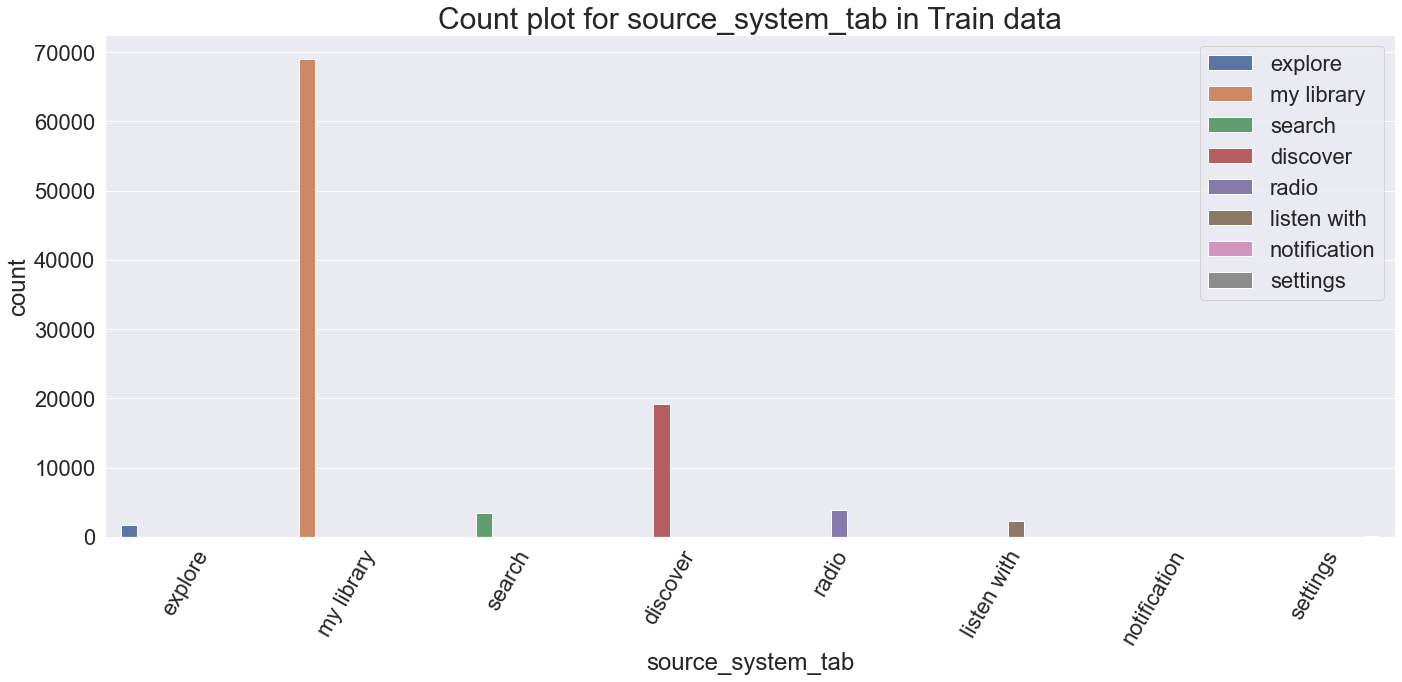

In [37]:
# Function for plotting the count plots
def count_plot(data, x, hue, type):
  plt.figure(figsize = (20, 10))
  sns.set(font_scale = 2)
  sns.countplot(x = x, hue = hue, data = data)
  plt.xlabel(x)
  plt.ylabel('count')
  plt.xticks(rotation = '60')
  plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
  plt.legend(loc='best')
  plt.tight_layout();
count_plot(train,'source_system_tab','source_system_tab','Train')

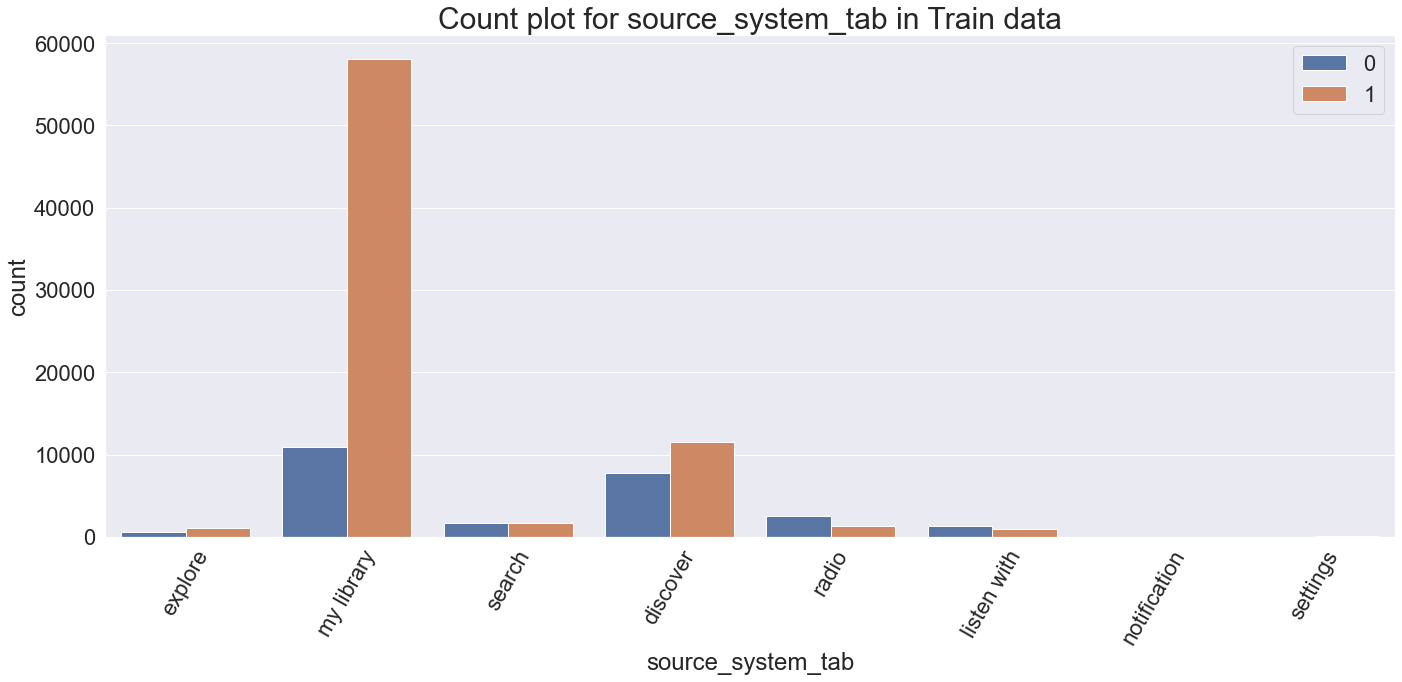

In [38]:
count_plot(train, 'source_system_tab', 'target', 'Train')

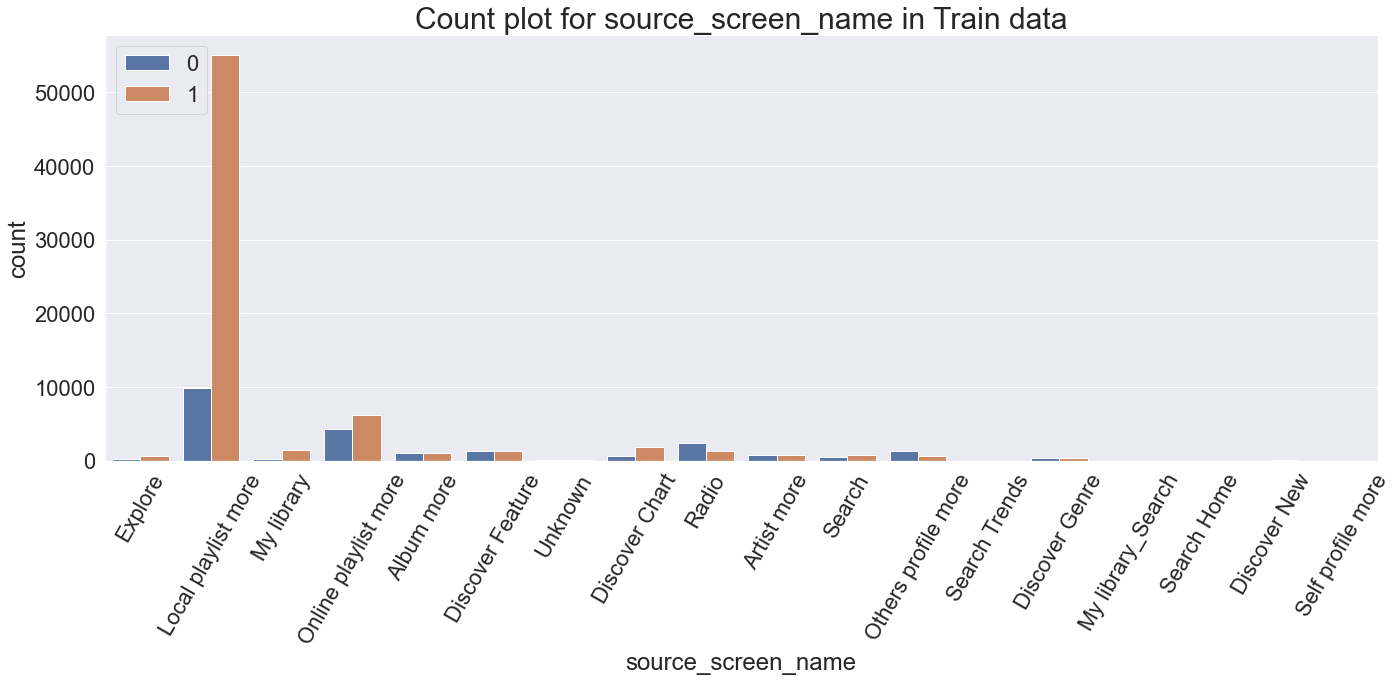

In [39]:
count_plot(train, 'source_screen_name', 'target', 'Train')

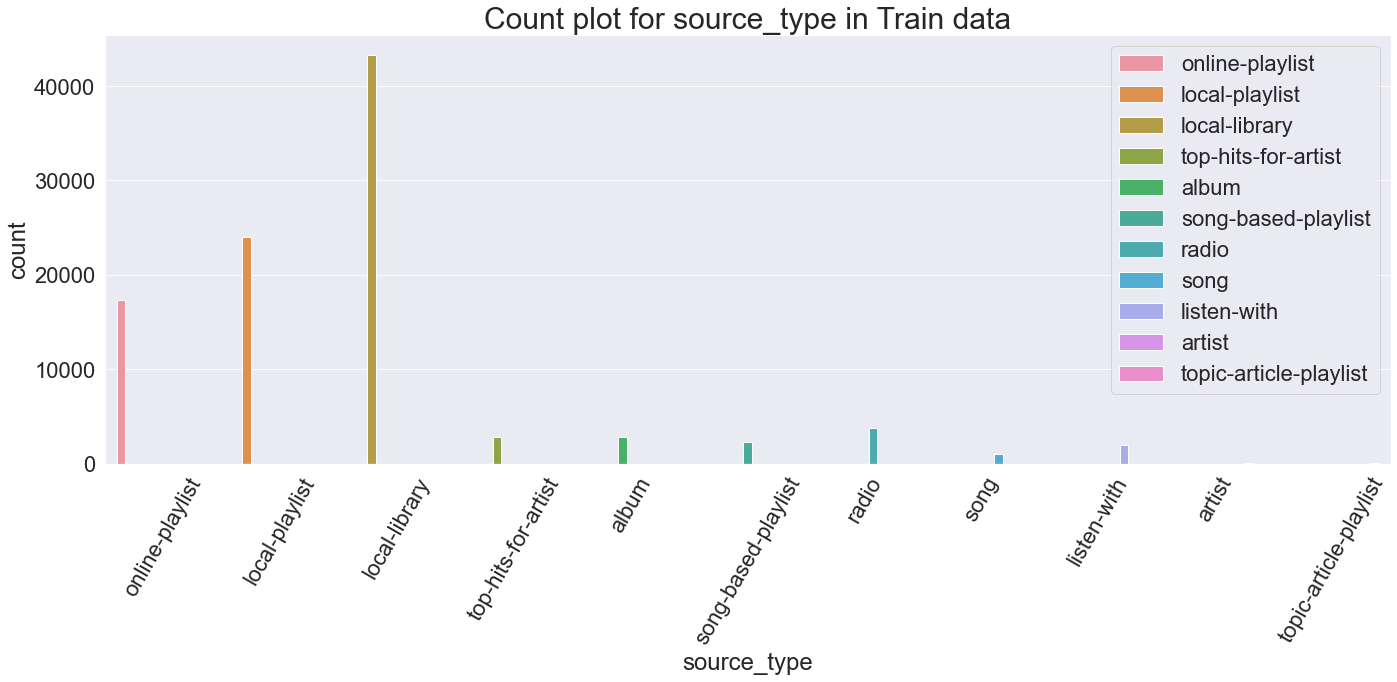

In [40]:
count_plot(train, 'source_type', 'source_type', 'Train')

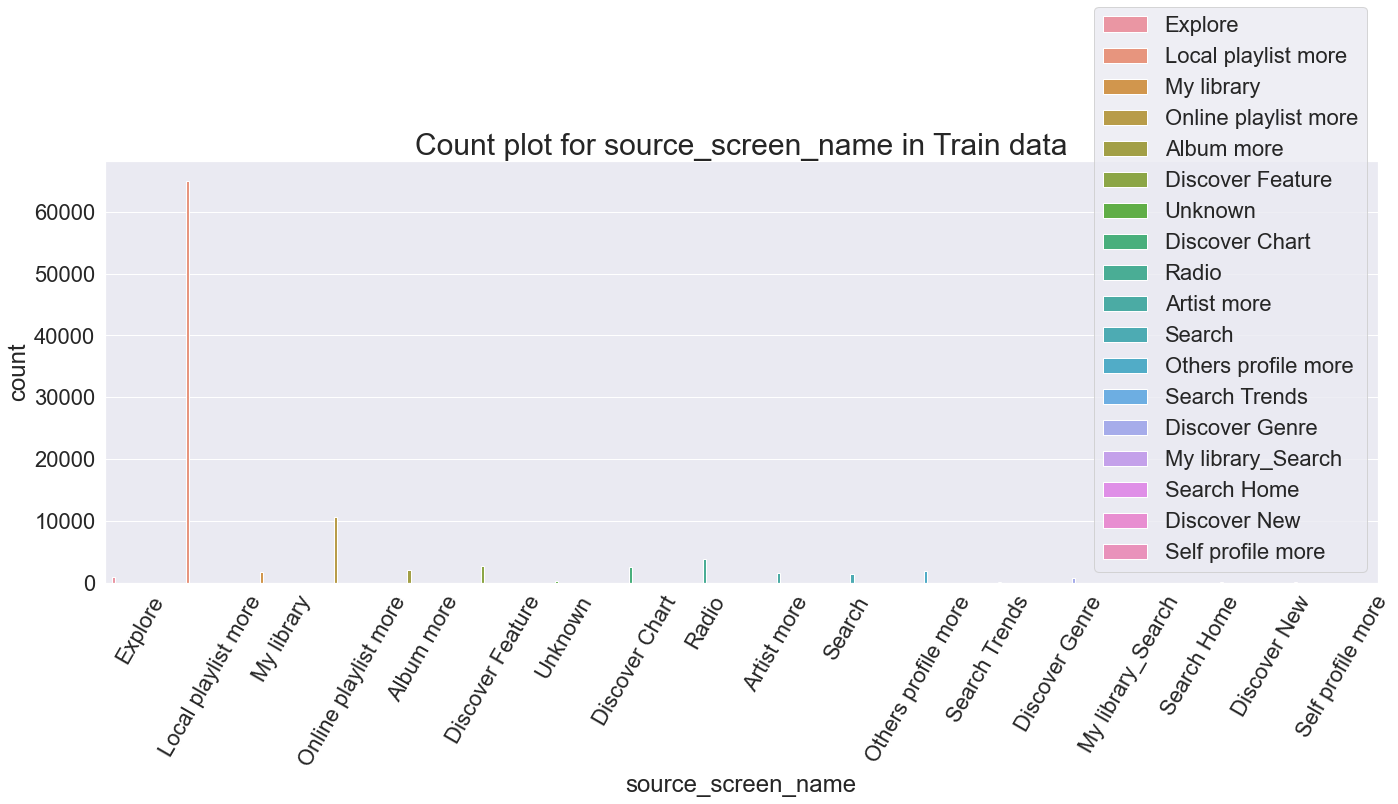

In [41]:
count_plot(train, 'source_screen_name', 'source_screen_name', 'Train')

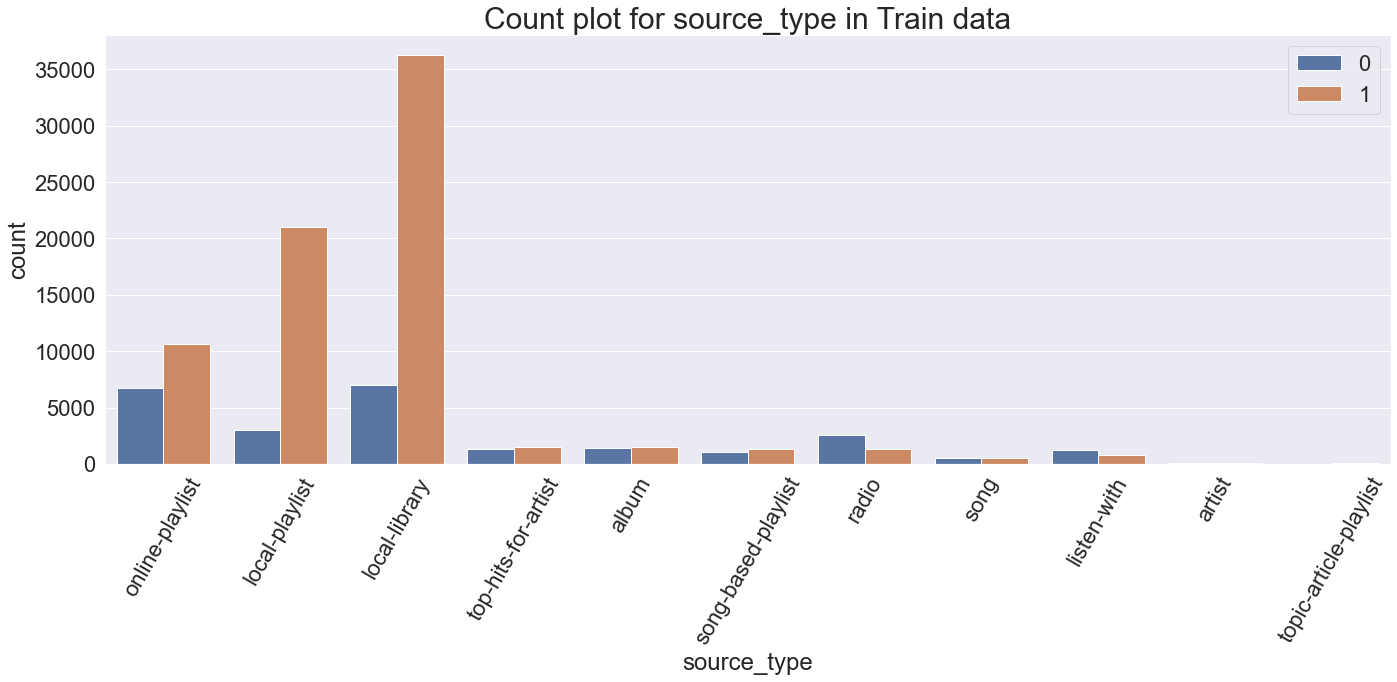

In [42]:
count_plot(train, 'source_type', 'target', 'Train')

### For Members Dataset

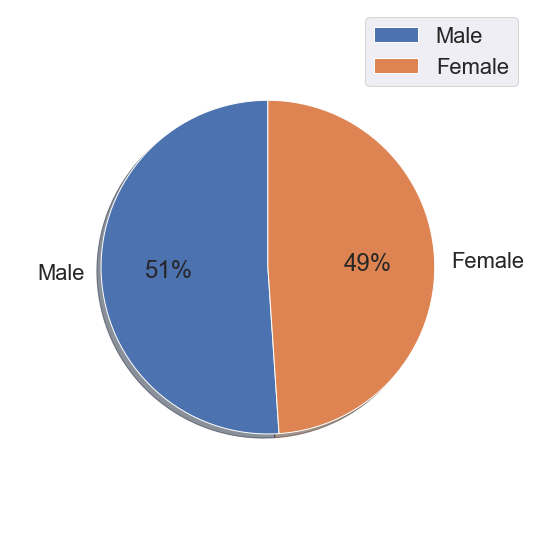

In [43]:
labels = ['Male','Female']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
plt.pie(sizes, 
        labels=labels, 
        autopct='%.0f%%',
        shadow=True, 
        radius=.8,
        startangle=90)
plt.legend(loc='best')
plt.tight_layout();

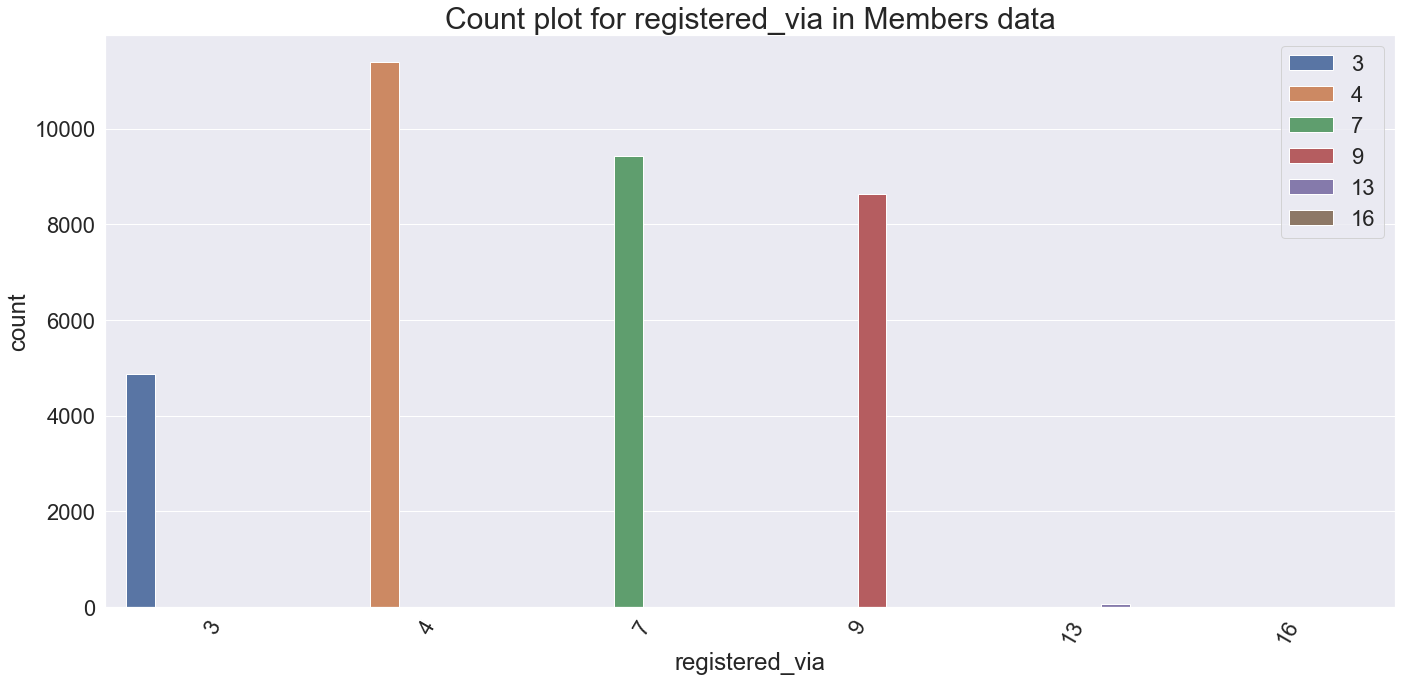

In [44]:
count_plot(members,'registered_via','registered_via', 'Members')

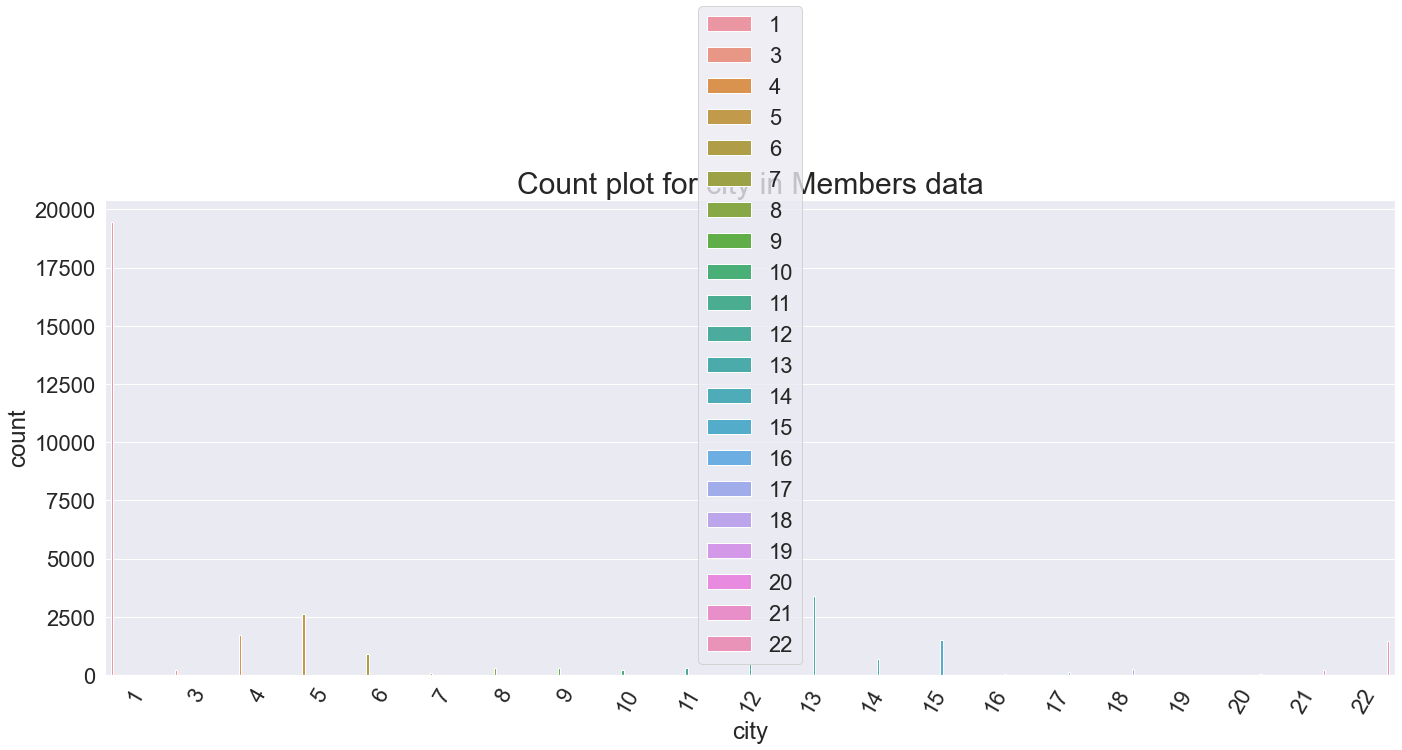

In [45]:
count_plot(members, 'city', 'city', 'Members')

### For Songs Dataset

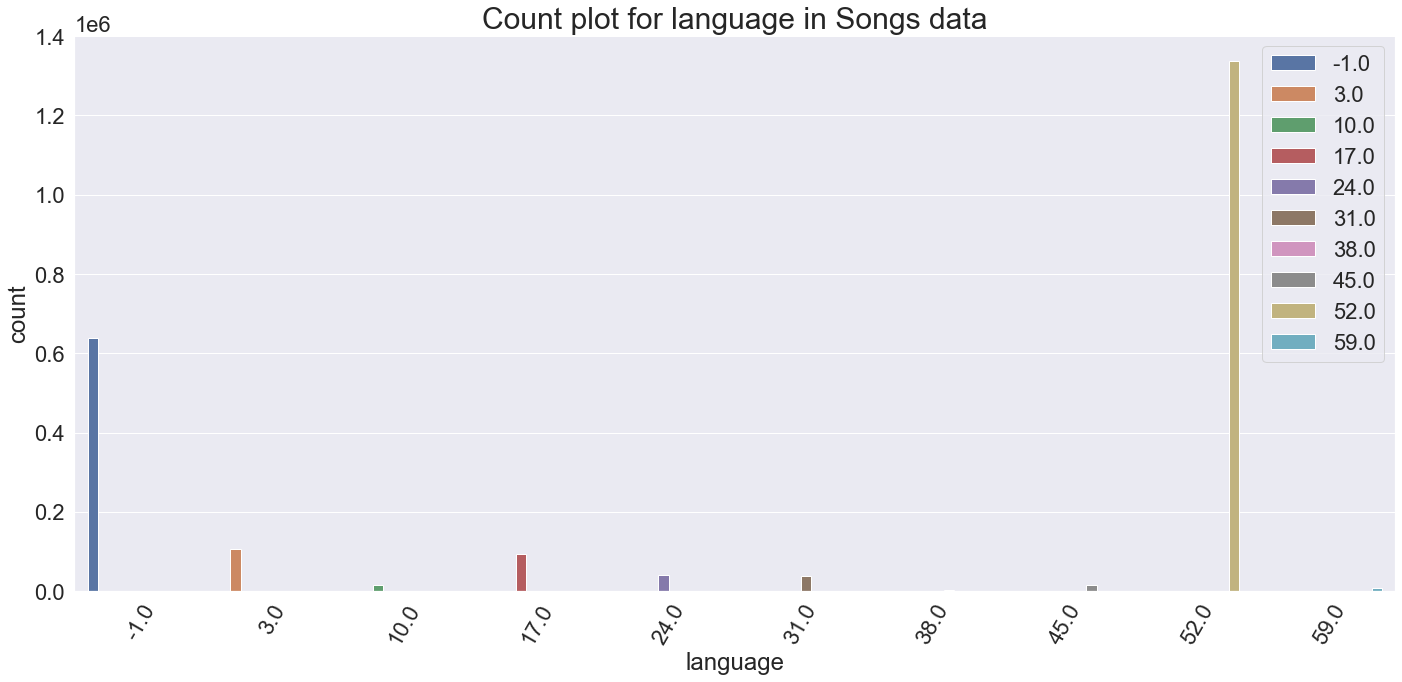

In [46]:
count_plot(songs, 'language','language', 'Songs')

### Data Preprocessing

In [48]:
t_s_merged = pd.merge(train, songs, on='song_id', how='left')
t_s_e_merged = pd.merge(t_s_merged, extra_info, on='song_id', how='left')
all_merged = pd.merge(t_s_e_merged, members, on='msno', how='left')

In [49]:
all_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc,city,bd,gender,registered_via,registration_init_time,expiration_date
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854,1,0,NaN,7,20120102,20171005
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183,13,24,female,9,20110525,20170911
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761,13,24,female,9,20110525,20170911
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063,13,24,female,9,20110525,20170911
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003,1,0,NaN,7,20120102,20171005


In [50]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   msno                    100000 non-null  object 
 1   song_id                 100000 non-null  object 
 2   source_system_tab       99697 non-null   object 
 3   source_screen_name      95727 non-null   object 
 4   source_type             99805 non-null   object 
 5   target                  100000 non-null  int64  
 6   song_length             99996 non-null   float64
 7   genre_ids               98498 non-null   object 
 8   artist_name             99996 non-null   object 
 9   composer                78528 non-null   object 
 10  lyricist                59309 non-null   object 
 11  language                99996 non-null   float64
 12  name                    99991 non-null   object 
 13  isrc                    91475 non-null   object 
 14  city                 

In [51]:
all_merged.isnull().sum()

msno                          0
song_id                       0
source_system_tab           303
source_screen_name         4273
source_type                 195
target                        0
song_length                   4
genre_ids                  1502
artist_name                   4
composer                  21472
lyricist                  40691
language                      4
name                          9
isrc                       8525
city                          0
bd                            0
gender                    38672
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### Dealing with missing values

<AxesSubplot:>

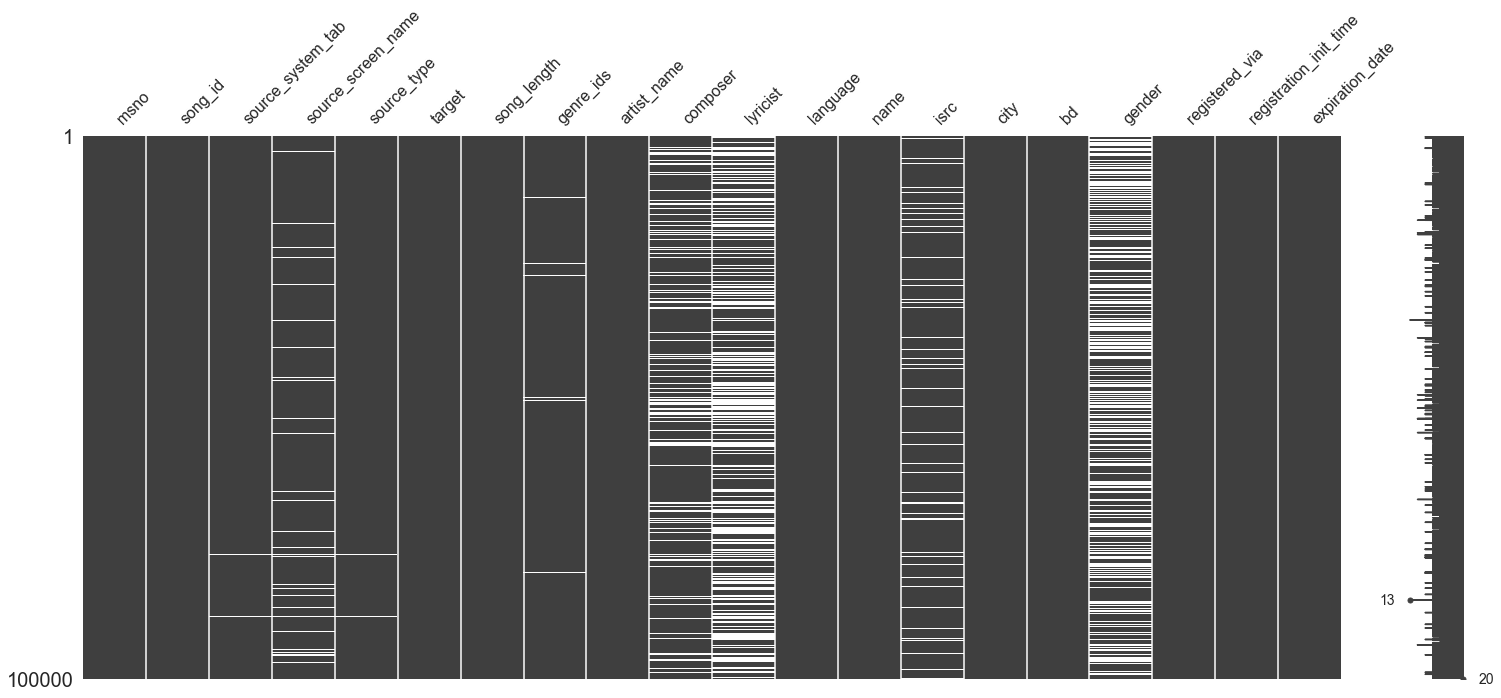

In [52]:
msno.matrix(all_merged)

In [53]:
for i in songs.select_dtypes(include=['object']).columns:
    songs[i][songs[i].isnull()] = 'unknown'
songs = songs.fillna(value=0)

### New feature extraction

In [54]:
all_merged.registration_init_time = pd.to_datetime(all_merged.registration_init_time, format='%Y%m%d', errors='ignore')
all_merged['registration_init_time_year'] = all_merged['registration_init_time'].dt.year
all_merged['registration_init_time_month'] = all_merged['registration_init_time'].dt.month
all_merged['registration_init_time_day'] = all_merged['registration_init_time'].dt.day

all_merged.expiration_date = pd.to_datetime(all_merged.expiration_date,  format='%Y%m%d', errors='ignore')
all_merged['expiration_date_year'] = all_merged['expiration_date'].dt.year
all_merged['expiration_date_month'] = all_merged['expiration_date'].dt.month
all_merged['expiration_date_day'] = all_merged['expiration_date'].dt.day

In [55]:
all_merged.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,song_length,genre_ids,artist_name,composer,...,gender,registered_via,registration_init_time,expiration_date,registration_init_time_year,registration_init_time_month,registration_init_time_day,expiration_date_year,expiration_date_month,expiration_date_day
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,206471.0,359,Bastille,Dan Smith| Mark Crew,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,284584.0,1259,Various Artists,NaN,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,255512.0,1019,Soundway,Kwadwo Donkoh,...,female,9,2011-05-25,2017-09-11,2011,5,25,2017,9,11
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,...,NaN,7,2012-01-02,2017-10-05,2012,1,2,2017,10,5


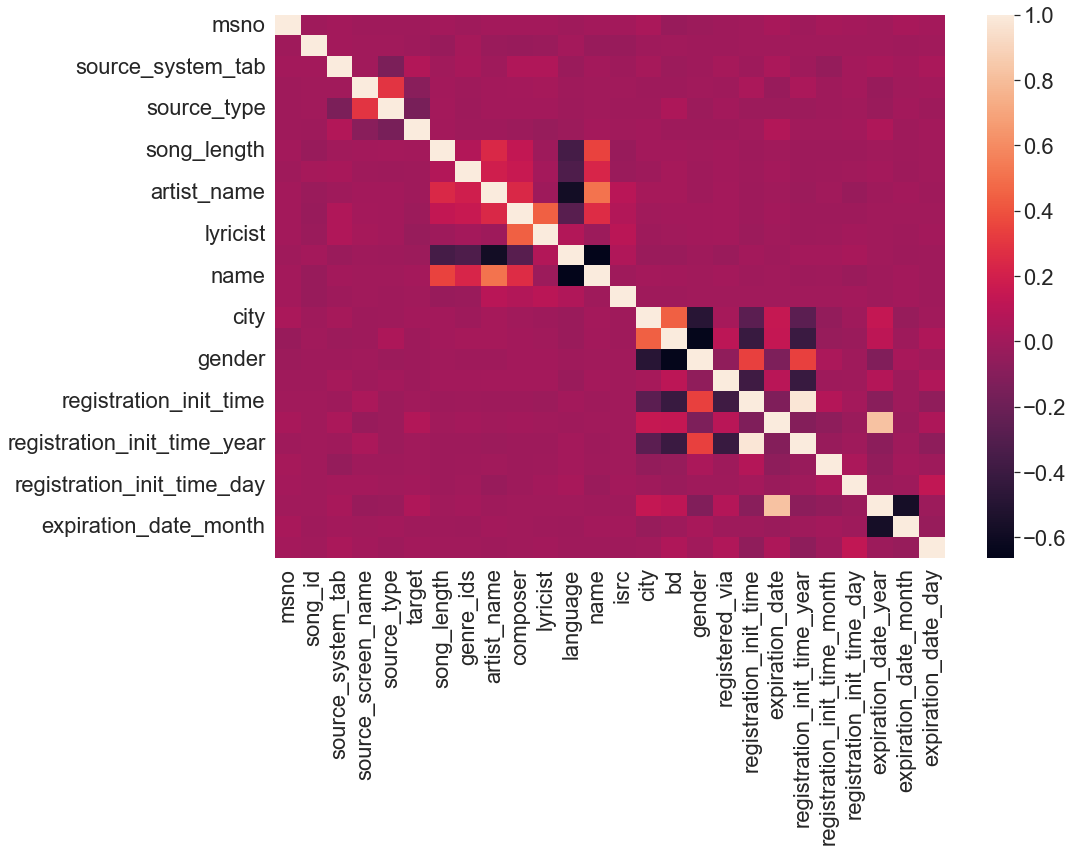

In [56]:
label_encoder = LabelEncoder()

for i in all_merged.columns:
    all_merged[i] = label_encoder.fit_transform(all_merged[i])
plt.figure(figsize=[15,10])
sns.heatmap(all_merged.corr())
plt.show();

### Model Building

In [57]:
X = all_merged.drop('target', axis=1)
y = all_merged.target
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [58]:
def model_with(model_name, X_train, X_val, y_train, y_val) :
    print("---------------------------------------------->")
    print("Training with :", model_name)
    print()
        
    if model_name == "Random Forest Classifier" :
        model = RandomForestClassifier(
            n_estimators=1000, 
        )
    elif model_name == "Extra Trees Classifier" :
        model = ExtraTreesClassifier(
            n_estimators=1000, 
        )
    elif model_name == "LightGBM Classifier" :
        model = lgbm.LGBMClassifier(
            n_estimators=1000, 
        )
    elif model_name == "XGBoost Classifier" :
        model = xgb.XGBClassifier(
            n_estimators=1000, 
        )
    elif model_name == "CatBoost Classifier" :
        model = cb.CatBoostClassifier(
            n_estimators=1000, 
            verbose=0
        )
    else :
        print("Model to be trained with not found.")
        
    model.fit(X_train, y_train)
    
    val_pred = model.predict(X_val)
    print(classification_report(y_val, val_pred))
    print()
    print("Accuracy :", accuracy_score(y_val, val_pred))
    print("ROC :", roc_auc_score(y_val, val_pred))
    
    print("-------------------------------------------->")
    print()

In [59]:
models = ['Random Forest Classifier', 'Extra Trees Classifier', 'LightGBM Classifier', 'XGBoost Classifier', 'CatBoost Classifier']

for i in models:
    model_with(i, X_train, X_val, y_train, y_val)

---------------------------------------------->
Training with : Random Forest Classifier

              precision    recall  f1-score   support

           0       0.77      0.56      0.65      6240
           1       0.87      0.94      0.90     18760

    accuracy                           0.85     25000
   macro avg       0.82      0.75      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.84812
ROC : 0.7534535427259308
-------------------------------------------->

---------------------------------------------->
Training with : Extra Trees Classifier

              precision    recall  f1-score   support

           0       0.74      0.59      0.66      6240
           1       0.87      0.93      0.90     18760

    accuracy                           0.85     25000
   macro avg       0.81      0.76      0.78     25000
weighted avg       0.84      0.85      0.84     25000


Accuracy : 0.84752
ROC : 0.7627863430102236
-------------------------------

### Random Forest and Weights

In [60]:
rand_f = RandomForestClassifier(
            n_estimators=1000,
            class_weight={0:1,1:2.9987204094}
)

rand_f.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 2.9987204094}, n_estimators=1000)

In [61]:
prediction = rand_f.predict(X_val)
print('Accuracy :', accuracy_score(y_val, prediction))

Accuracy : 0.84724


### Extra Trees Classifier

In [62]:
et = ExtraTreesClassifier(n_estimators=1000, n_jobs=-1)
et.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=1000, n_jobs=-1)

In [63]:
pred_et = et.predict(X_val)
print('Accuracy :', accuracy_score(y_val, pred_et))

Accuracy : 0.84728
